In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
hdul = fits.open('Last_method.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
Flux_r = data.field('rFApflux')
dc_major = data.field('DC_maj')
DC = array(dc_major)
lgz = data.field('LGZ_size')
LGZ = array(lgz)

IR = data.field('IRClass')
IR_class = array(IR)
B = data.field('B_rest')
B_band = array(B)

In [4]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [5]:
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [6]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z))
Pw_g  = (power(Lum_dG,Flux_g,z))
Pw = power(Lum_d,flux_tot,z)
pw22 = (power(Lum_d,Flux_22,z))

In [7]:
Pw22_resh = np.reshape(Pw22,(21544,))
pw22_resh = np.reshape(pw22,(21544,))
pw_resh = np.reshape(Pw,(21544,))

L_low_f = pw_resh/1e7

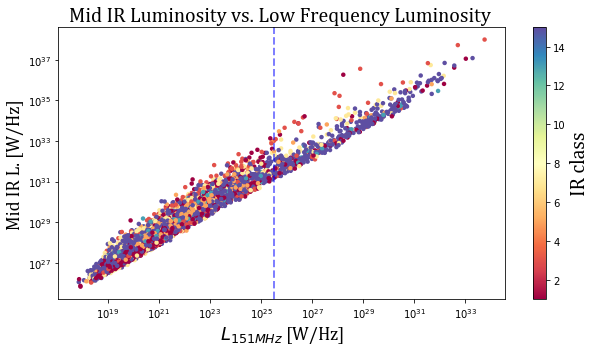

In [8]:
bsfont = {'fontname':'Cambria Math'}

#Limit=[]
#for j in range(len(Pw)):
    #Limit.append(4e43)

#logPlot = plt.gca()
#logPlot.loglog(Pw,Limit,'r--',c='black')
plt.figure(figsize=(10,5))
val = plt.scatter(Pw/1e11, pw22_resh/1e7, c=IR_class,s=20,cmap='Spectral',lw=0)
plt.axvline(x=10**(25.5),lw=2,linestyle="--",c='blue',alpha=0.5)
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('IR class',fontsize=20,**bsfont)
#plt.ylim(0,1e48)
plt.xscale('log')
plt.yscale('log')
plt.title('Mid IR Luminosity vs. Low Frequency Luminosity ',fontsize = 20,**bsfont)
plt.xlabel('$L_{151MHz}$ [W/Hz]', fontsize = 18,**bsfont)
plt.ylabel('Mid IR L. [W/Hz]', fontsize = 18,**bsfont)
plt.savefig('IR Class.png')
plt.show()

In [9]:
Tot_sources = np.vstack((L_low_f,z,IR_class,B_band,DC,LGZ)).T

In [10]:
HERGs = Tot_sources[(L_low_f>10**(25.5))&(IR_class>=1)]

H_b = HERGs[:,3]
H_z = HERGs[:,1]
H_P = HERGs[:,0]
H_dc = HERGs[:,4]
H_lgz = HERGs[:,5]

n_HERGs = np.vstack((H_P,H_z,H_b,H_dc,H_lgz)).T

In [50]:
QSO = n_HERGs[(H_b<(-24))]
RG = n_HERGs[(H_b>(-24))]

P_qso = QSO[:,0]
z_qso = QSO[:,1]
dc_qso = np.nan_to_num(QSO[:,3])
lgz_qso = np.nan_to_num(QSO[:,4])

P_rg = RG[:,0]
z_rg = RG[:,1]
dc_rg = np.nan_to_num(RG[:,3]*2)
lgz_rg = np.nan_to_num(RG[:,4])


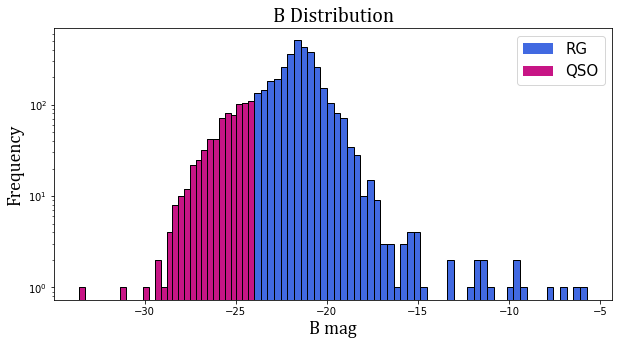

In [46]:
plt.figure(figsize=(10,5))
plt.hist(RG[:,2], color= "royalblue", bins = 50,label='RG')
plt.hist(RG[:,2], color= "royalblue", bins = 50, fill = False)
plt.hist(QSO[:,2], color= "mediumvioletred", bins = 30, label='QSO')
plt.hist(QSO[:,2], color= "royalblue", bins = 30, fill = False)
plt.title("B Distribution", fontsize = 20,**bsfont)
plt.yscale('log')
plt.xlabel("B mag", fontsize= 18,**bsfont)
plt.ylabel("Frequency", fontsize = 18,**bsfont)
rwidth=10
plt.legend(loc=1, prop={'size': 15})
plt.savefig('B.png')

fig = plt.gcf()


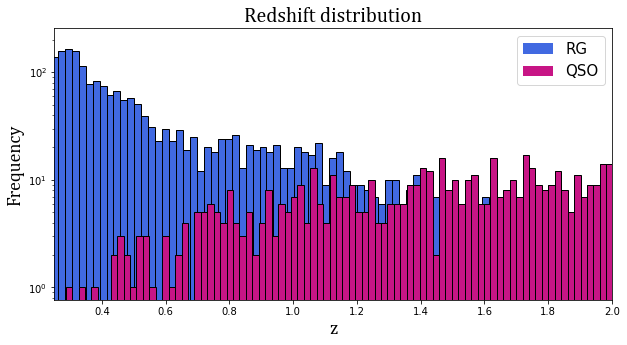

In [14]:
plt.figure(figsize=(10,5))

plt.hist(RG[:,1], color= "royalblue", bins = 200,label='RG')
plt.hist(RG[:,1], color= "royalblue", bins = 200, fill = False)
plt.hist(QSO[:,1], color= "mediumvioletred", bins = 300, label='QSO')
plt.hist(QSO[:,1], color= "royalblue", bins = 300, fill = False)
plt.title("Redshift distribution", fontsize = 20,**bsfont)
plt.yscale('log')
plt.xlabel("z", fontsize= 18,**bsfont)
plt.ylabel("Frequency", fontsize = 18,**bsfont)
rwidth=10
plt.legend(loc=1, prop={'size': 15})
plt.xlim(0.25,2)
plt.savefig('z_last.png')
fig = plt.gcf()

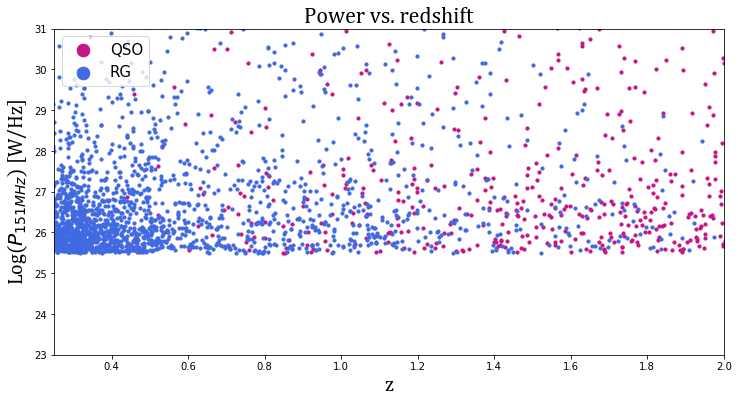

In [15]:
bsfont = {'fontname':'Cambria Math'}


f = plt.figure(figsize=(12,6))
plt.ylabel('Log($P_{151MHz}$) [W/Hz]', fontsize = 20,**bsfont)
plt.xlabel('z', fontsize=20,**bsfont)

plt.title('Power vs. redshift',fontsize=22,**bsfont)

plt.scatter(QSO[:,1],np.log10(QSO[:,0]),marker="o",c='mediumvioletred',s=10,label = 'QSO')
plt.scatter(RG[:,1],np.log10(RG[:,0]),marker="o",c='royalblue',s=10, label = 'RG')
plt.legend(loc=2, prop={'size': 15},markerscale=4)
plt.xlim(0.25,2)
plt.ylim(23,31)
plt.savefig('pz_last.png')
plt.show()

In [47]:
for i in np.arange(len(dc_qso)):
    if (lgz_qso[i]==0):
        print (lgz_qso)
    else:
        dc_qso[i] = lgz_qso[i]

[3.93359601e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.61380217e+01
 0.00000000e+00 3.64327188e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.88529550e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.00004173e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37794591e+02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.33319033e+01 1.06395846e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.22089194e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.18538762e+02 0.00000000e+00
 3.78538853e+01 0.000000

In [48]:
for i in np.arange(len(dc_rg)):
    if (lgz_rg[i]==0):
        print (lgz_rg)
    else:
        dc_rg[i] = lgz_rg[i]

[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39503618  0.          0.         ...  0.          0.
  0.        ]
[32.39

In [38]:
def Box(x,z,mn,mx,P,Mn,Mx,n):
    cat = x[(z >= mn) & (z <= mx) & (P >= Mn) & (P <= Mx)]
    return array(cat[:,n])

In [39]:
Q = np.vstack((P_qso,z_qso,dc_qso)).T
R = np.vstack((P_rg,z_rg,dc_rg)).T

In [40]:
ad_QSO = array(cosmo.angular_diameter_distance(z_qso)) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(z_rg))

def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size

#a = DC_MAJ[DC_MAJ != 0]
#b = DC_RG[DC_RG != 0]


L_QSO = array(LZ(ad_QSO,dc_qso))
L_RG = array(LZ(ad_RG,dc_rg))

L_QSO.sort()
L_RG.sort()

L_qso = L_QSO[L_QSO != 0]
L_rg = L_RG[L_RG != 0]

In [41]:
Tot_rg = np.vstack((z_rg,P_rg,L_RG)).T
Tot_qso = np.vstack((z_qso,P_qso,L_QSO)).T

In [42]:
Box(Tot_rg,z_rg,1.5,1.75,P_rg,1e29,1e30,2).shape

(4,)

In [43]:
Box(Tot_qso,z_qso,1.5,1.75,P_qso,1e29,1e31,2).shape

(18,)

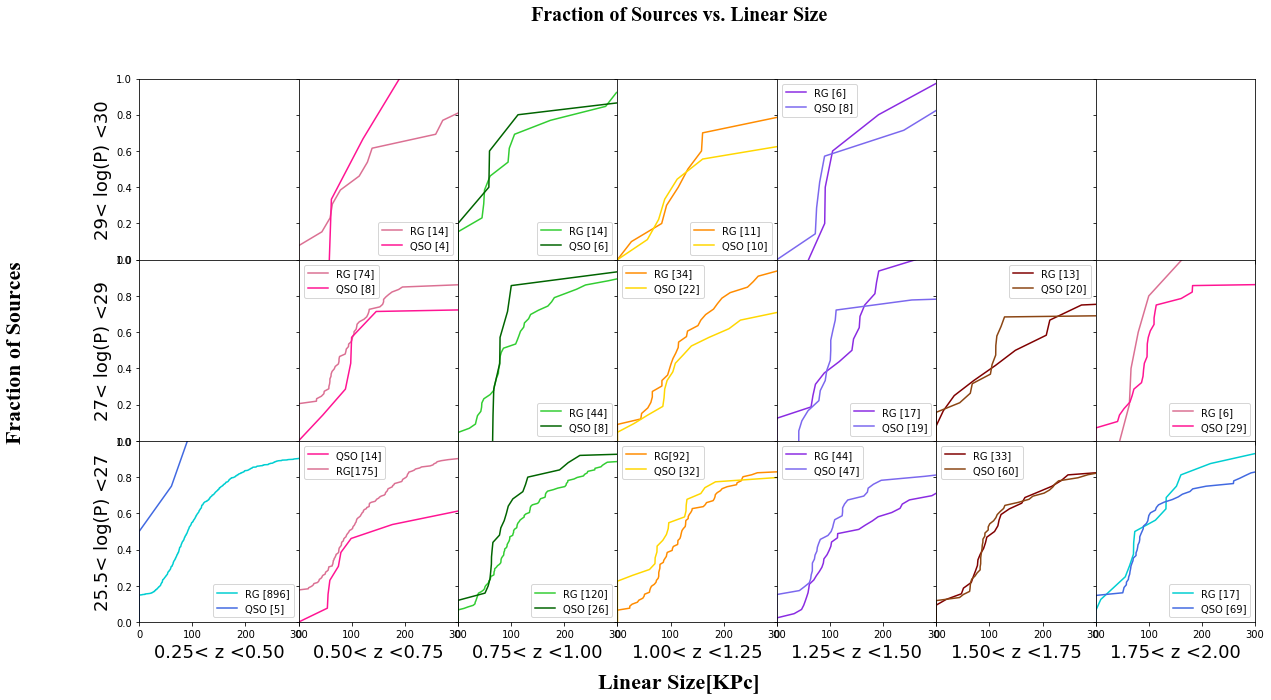

In [49]:
csfont = {'fontname':'Times New Roman'}

fig, axes  = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True,figsize = (20,10))
axes[2,0].plot(Box(Tot_rg,z_rg,0.25,0.50,P_rg,10**(25.5),1e27,2),np.linspace(0,1.0,num=896), c = 'darkturquoise', label = 'RG [896]')
axes[2,0].plot(Box(Tot_qso,z_qso,0.25,0.50,P_qso,10**(25.5),1e27,2),np.linspace(0,1.0,num=5), c='royalblue',label='QSO [5]')
axes[2,0].legend()
axes[2,0].set_xlabel('0.25< z <0.50',fontsize=18)
axes[2,0].set_ylabel('25.5< log(P) <27',fontsize=18)
axes[2,0].set_xlim(0,300)

axes[2,1].plot(Box(Tot_qso,z_qso,0.5,0.75,P_qso,10**(25.5),1e27,2),np.linspace(0,1.0,num=14), c='deeppink',label='QSO [14]')
axes[2,1].plot(Box(Tot_rg,z_rg,0.5,0.75,P_rg,10**(25.5),1e27,2),np.linspace(0,1.0,num=175), c = 'palevioletred', label = 'RG[175]')
axes[2,1].legend()
axes[2,1].set_xlabel('0.50< z <0.75',fontsize=18)

axes[2,2].plot(Box(Tot_rg,z_rg,0.75,1.0,P_rg,10**(25.5),1e27,2),np.linspace(0,1.0,num=120), c = 'limegreen', label = 'RG [120]')
axes[2,2].plot(Box(Tot_qso,z_qso,0.75,1.0,P_qso,10**(25.5),1e27,2),np.linspace(0,1.0,num=26), c='darkgreen',label='QSO [26]')
axes[2,2].legend()
axes[2,2].set_xlabel('0.75< z <1.00',fontsize=18)

axes[2,3].plot(Box(Tot_rg,z_rg,1.0,1.25,P_rg,10**(25.5),1e27,2),np.linspace(0,1.0,num=92), c = 'darkorange', label = 'RG[92]')
axes[2,3].plot(Box(Tot_qso,z_qso,1.0,1.25,P_qso,10**(25.5),1e27,2),np.linspace(0,1.0,num=32), c='gold',label='QSO [32]')
axes[2,3].legend()
axes[2,3].set_xlabel('1.00< z <1.25',fontsize=18)

axes[2,4].plot(Box(Tot_rg,z_rg,1.25,1.5,P_rg,10**(25.5),1e27,2),np.linspace(0,1.0,num=44), c = 'blueviolet', label = 'RG [44]')
axes[2,4].plot(Box(Tot_qso,z_qso,1.25,1.5,P_qso,10**(25.5),1e27,2),np.linspace(0,1.0,num=47), c='mediumslateblue',label='QSO [47]')
axes[2,4].legend()
axes[2,4].set_xlabel('1.25< z <1.50',fontsize=18)

axes[2,5].plot(Box(Tot_rg,z_rg,1.5,1.75,P_rg,10**(25.5),1e27,2),np.linspace(0,1.0,num=33), c = 'maroon', label = 'RG [33]')
axes[2,5].plot(Box(Tot_qso,z_qso,1.5,1.75,P_qso,10**(25.5),1e27,2),np.linspace(0,1.0,num=60), c='saddlebrown',label='QSO [60]')
axes[2,5].legend()
axes[2,5].set_xlabel('1.50< z <1.75',fontsize=18)

axes[2,6].plot(Box(Tot_rg,z_rg,1.75,2.00,P_rg,10**(25.5),1e27,2),np.linspace(0,1.0,num=17), c = 'darkturquoise', label = 'RG [17]')
axes[2,6].plot(Box(Tot_qso,z_qso,1.75,2.00,P_qso,10**(25.5),1e27,2),np.linspace(0,1.0,num=69), c='royalblue',label='QSO [69]')
axes[2,6].legend()
axes[2,6].set_xlabel('1.75< z <2.00',fontsize=18)

axes[1,0].set_ylabel('27< log(P) <29',fontsize=18)

axes[1,1].plot(Box(Tot_rg,z_rg,0.5,0.75,P_rg,1e27,1e29,2),np.linspace(0,1.0,num=74), c = 'palevioletred', label = 'RG [74]')
axes[1,1].plot(Box(Tot_qso,z_qso,0.5,0.75,P_qso,1e27,1e29,2),np.linspace(0,1.0,num=8), c='deeppink',label='QSO [8]')
axes[1,1].legend()

axes[1,2].plot(Box(Tot_rg,z_rg,0.75,1.0,P_rg,1e27,1e29,2),np.linspace(0,1.0,num=44), c = 'limegreen', label = 'RG [44]')
axes[1,2].plot(Box(Tot_qso,z_qso,0.75,1.0,P_qso,1e27,1e29,2),np.linspace(0,1.0,num=8), c='darkgreen',label='QSO [8]')
axes[1,2].legend()

axes[1,3].plot(Box(Tot_rg,z_rg,1.0,1.25,P_rg,1e27,1e29,2),np.linspace(0,1.0,num=34), c = 'darkorange', label = 'RG [34]')
axes[1,3].plot(Box(Tot_qso,z_qso,1.0,1.25,P_qso,1e27,1e29,2),np.linspace(0,1.0,num=22), c='gold',label='QSO [22]')
axes[1,3].legend()

axes[1,4].plot(Box(Tot_rg,z_rg,1.25,1.5,P_rg,1e27,1e29,2),np.linspace(0,1.0,num=17), c = 'blueviolet', label = 'RG [17]')
axes[1,4].plot(Box(Tot_qso,z_qso,1.25,1.5,P_qso,1e27,1e29,2),np.linspace(0,1.0,num=19), c='mediumslateblue',label='QSO [19]')
axes[1,4].legend(loc=4)

axes[1,5].plot(Box(Tot_rg,z_rg,1.5,1.75,P_rg,1e27,1e29,2),np.linspace(0,1.0,num=13), c = 'maroon', label = 'RG [13]')
axes[1,5].plot(Box(Tot_qso,z_qso,1.5,1.75,P_qso,1e27,1e29,2),np.linspace(0,1.0,num=20), c='saddlebrown',label='QSO [20]')
axes[1,5].legend()

axes[1,6].plot(Box(Tot_rg,z_rg,1.75,2.00,P_rg,1e27,1e29,2),np.linspace(0,1.0,num=6),c = 'palevioletred', label = 'RG [6]')
axes[1,6].plot(Box(Tot_qso,z_qso,1.75,2.00,P_qso,1e27,1e29,2),np.linspace(0,1.0,num=29), c='deeppink',label='QSO [29]')
axes[1,6].legend()


axes[0,1].plot(Box(Tot_rg,z_rg,0.5,0.75,P_rg,1e29,1e30,2),np.linspace(0,1.0,num=14),c = 'palevioletred', label = 'RG [14]')
axes[0,1].plot(Box(Tot_qso,z_qso,0.5,0.75,P_qso,1e29,1e31,2),np.linspace(0,1.0,num=4), c='deeppink',label='QSO [4]')
axes[0,1].legend()

axes[0,2].plot(Box(Tot_rg,z_rg,0.75,1.0,P_rg,1e29,1e30,2),np.linspace(0,1.0,num=14),c = 'limegreen', label = 'RG [14]')
axes[0,2].plot(Box(Tot_qso,z_qso,0.75,1.0,P_qso,1e29,1e31,2),np.linspace(0,1.0,num=6), c='darkgreen',label='QSO [6]')
axes[0,2].legend()

axes[0,3].plot(Box(Tot_rg,z_rg,1.0,1.25,P_rg,1e29,1e30,2),np.linspace(0,1.0,num=11),c = 'darkorange', label = 'RG [11]')
axes[0,3].plot(Box(Tot_qso,z_qso,1.0,1.25,P_qso,1e29,1e31,2),np.linspace(0,1.0,num=10), c='gold',label='QSO [10]')
axes[0,3].legend(loc=4)

axes[0,4].plot(Box(Tot_rg,z_rg,1.25,1.5,P_rg,1e29,1e30,2),np.linspace(0,1.0,num=6),c = 'blueviolet', label = 'RG [6]')
axes[0,4].plot(Box(Tot_qso,z_qso,1.25,1.5,P_qso,1e29,1e31,2),np.linspace(0,1.0,num=8), c='mediumslateblue',label='QSO [8]')
axes[0,4].legend()

axes[0,0].set_ylabel('29< log(P) <30',fontsize=18)
plt.ylim(0,1)

plt.subplots_adjust(wspace=0,hspace=0)
fig.text(0.5, 0.04, 'Linear Size[KPc]', va='center', ha='center',fontsize=22,**csfont)
fig.text(0.04, 0.5, 'Fraction of Sources', va='center', ha='center', rotation='vertical',fontsize=22,**csfont)
plt.suptitle('Fraction of Sources vs. Linear Size', fontsize=20,**csfont)
plt.savefig('CDF_last.png')
plt.show()


In [38]:
#Errors
e_25 = array([0.8467,0.940,0.806,0.9718,0.6867,0.7867])
E_25  = np.reshape(e_25,(6,))
e_27 = array([0.8792,0.8988563,0.56829,0.425,0.6947,.528043])
e_29 = array([0.99,0.425,1.257,0.7063,0.9718])

In [39]:
L_25 = array([1.9387755102040816,1.7627118644067796,2.630434782608696,2.9615384615384617,1.703125,2.731707317073171])
z_25 = array([0.5841,0.86085,1.0854,1.3845,1.6236,1.8355])
P_25 = array([1.0011820419393828e+26,4.1794092085639787e+26,7.2448080444182069e+26,1.1304026182738521e+26,9.64151266571914e+25,9.436184747986772e+25,])

In [40]:
L_27 = array([1.0391116647978043,1.894736842105263,1.641,1.945945945945946,2.4069767441860463,0.95])
z_27 = array([0.59565,0.8410486876964569,1.1219999999999999,1.342,1.6171,1.8428])
P_27 = array([3.4563870665272703e+27,5.662409845100991e+2,72.4213245270663558e+27,5.781169410346066e+27,8.138139966662929e+27,6.391489341957105e+27])

In [41]:
L_29 = array([2.58,2.35,1.0033943647605754,1.429659410915996,1.0139321135088786])
z_29 = array([0.5758000000000001,0.8944670988559723,1.1423366069793701,1.3595000000000002,1.6317499718666078])
P_29 = array([2.9148196364880475e+29,3.63368575540703e+29,4.122812065258961e+29,2.0873163830181378e+29,4.5183038657429935e+29])

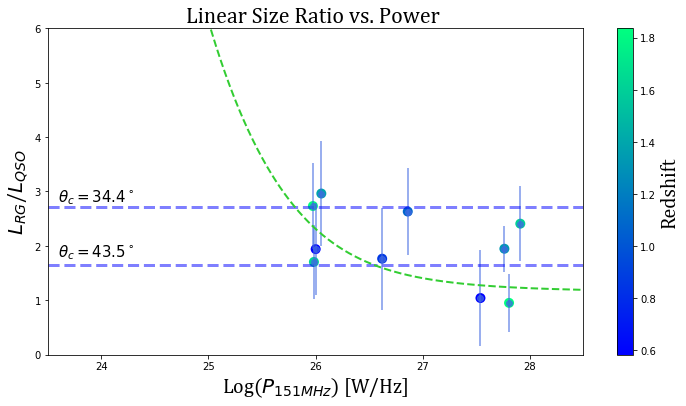

In [51]:
bsfont = {'fontname':'Cambria Math'}


f = plt.figure(figsize=(12,6))
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('Log($P_{151MHz}$) [W/Hz]', fontsize=20,**bsfont)

plt.title('Linear Size Ratio vs. Power ',fontsize=22,**bsfont)

plt.errorbar(np.log10(P_25),L_25,yerr=E_25, c = 'royalblue',fmt='o',alpha=0.7)
plt.errorbar(np.log10(P_27),L_27,yerr=e_27,c = 'royalblue',fmt='o',alpha=0.7)
plt.errorbar(np.log10(P_29),L_29,yerr=e_29,c = 'royalblue',fmt='o',alpha=0.7)

val = plt.scatter(np.log10(P_25),L_25,c=z_25,s=100,cmap='winter',lw=0)
plt.scatter(np.log10(P_27),L_27,c=z_27,s=100,cmap='winter',lw=0)
plt.scatter(np.log10(P_29),L_29,c=z_29,s=100,cmap='winter',lw=0)
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('Redshift',fontsize=20,**bsfont)

plt.text(23.6,1.8, r'$\theta_c=43.5^\circ$',fontsize = 15,**bsfont)
plt.text(23.6,2.82, r'$\theta_c=34.4^\circ$',fontsize = 15,**bsfont)
plt.axhline(y=1.646,lw=3,linestyle="--",c='blue',alpha=0.5)
plt.axhline(y=2.722,lw=3,linestyle="--",c='blue',alpha=0.5)

plt.plot(np.log10(L_low_f),receding_ratio,lw=2,linestyle="--",c='limegreen')
plt.xlim(23.5,28.5)
plt.ylim(0,6)
plt.savefig('LP_last.pdf')
plt.show()

In [43]:
L_0 = 1.5e26

def q_frac(L,theta):
    fraction = 1-((1+(L/L_0)*(np.tan(theta)**2)))**(-0.5)
    return fraction

In [46]:
frac = q_frac(L_low_f,np.radians(38.43))
theta_pred = np.arccos(1-frac)
fs_rg = np.arccos(np.cos(theta_pred)/2)
fs_qso = np.arccos((1+np.cos(theta_pred))/2)
receding_ratio = np.sin(fs_rg)/np.sin(fs_qso)
L_low_f.sort()

(24, 28)

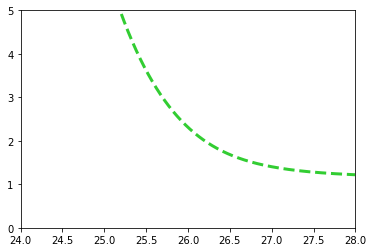

In [48]:
plt.plot(np.log10(L_low_f),receding_ratio,lw=3,linestyle="--",c='limegreen')
plt.plot(np.log10(L_low_f),np.log10(1/(L_low_f)**2),lw=2,linestyle="--",c='black')
plt.ylim(0,5)
plt.xlim(24,28)

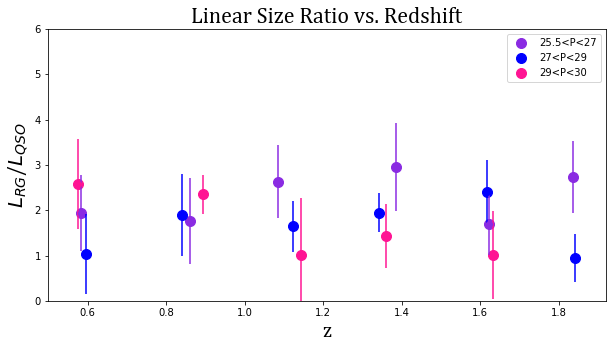

In [55]:
f = plt.figure(figsize=(10,5))

plt.scatter(z_25,L_25,c='blueviolet',s=100, label = '25.5<P<27')
plt.scatter(z_27,L_27,c='blue',s=100,label = '27<P<29')
plt.scatter(z_29,L_29,c='deeppink',s=100, label = '29<P<30')

plt.errorbar(z_25,L_25,yerr=E_25, c = 'blueviolet',fmt='o')
plt.errorbar(z_27,L_27,yerr=e_27,c = 'blue',fmt='o')
plt.errorbar(z_29,L_29,yerr=e_29,c = 'deeppink',fmt='o')

plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('z', fontsize=20,**bsfont)
plt.title('Linear Size Ratio vs. Redshift',fontsize=22,**bsfont)
plt.ylim(0,6)
plt.legend()
plt.savefig('zl_last.pdf')
plt.show()

In [655]:
from astropy.stats import median_absolute_deviation

In [677]:
median_absolute_deviation(Box(Tot_qso,z_qso,1.25,1.5,P_qso,1e29,1e31,2))/median_absolute_deviation(Box(Tot_rg,z_rg,1.25,1.5,P_rg,1e29,1e31,2))






0.7063160696310153